<a href="https://colab.research.google.com/github/farisazizy/Artificial-Intelligence/blob/main/Tupro_2_Fuzzy_with_Sugeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Peringkat Restoran berdasarkan Kualitas Pelayanan dan Makanan Menggunakan Fuzzy Logic

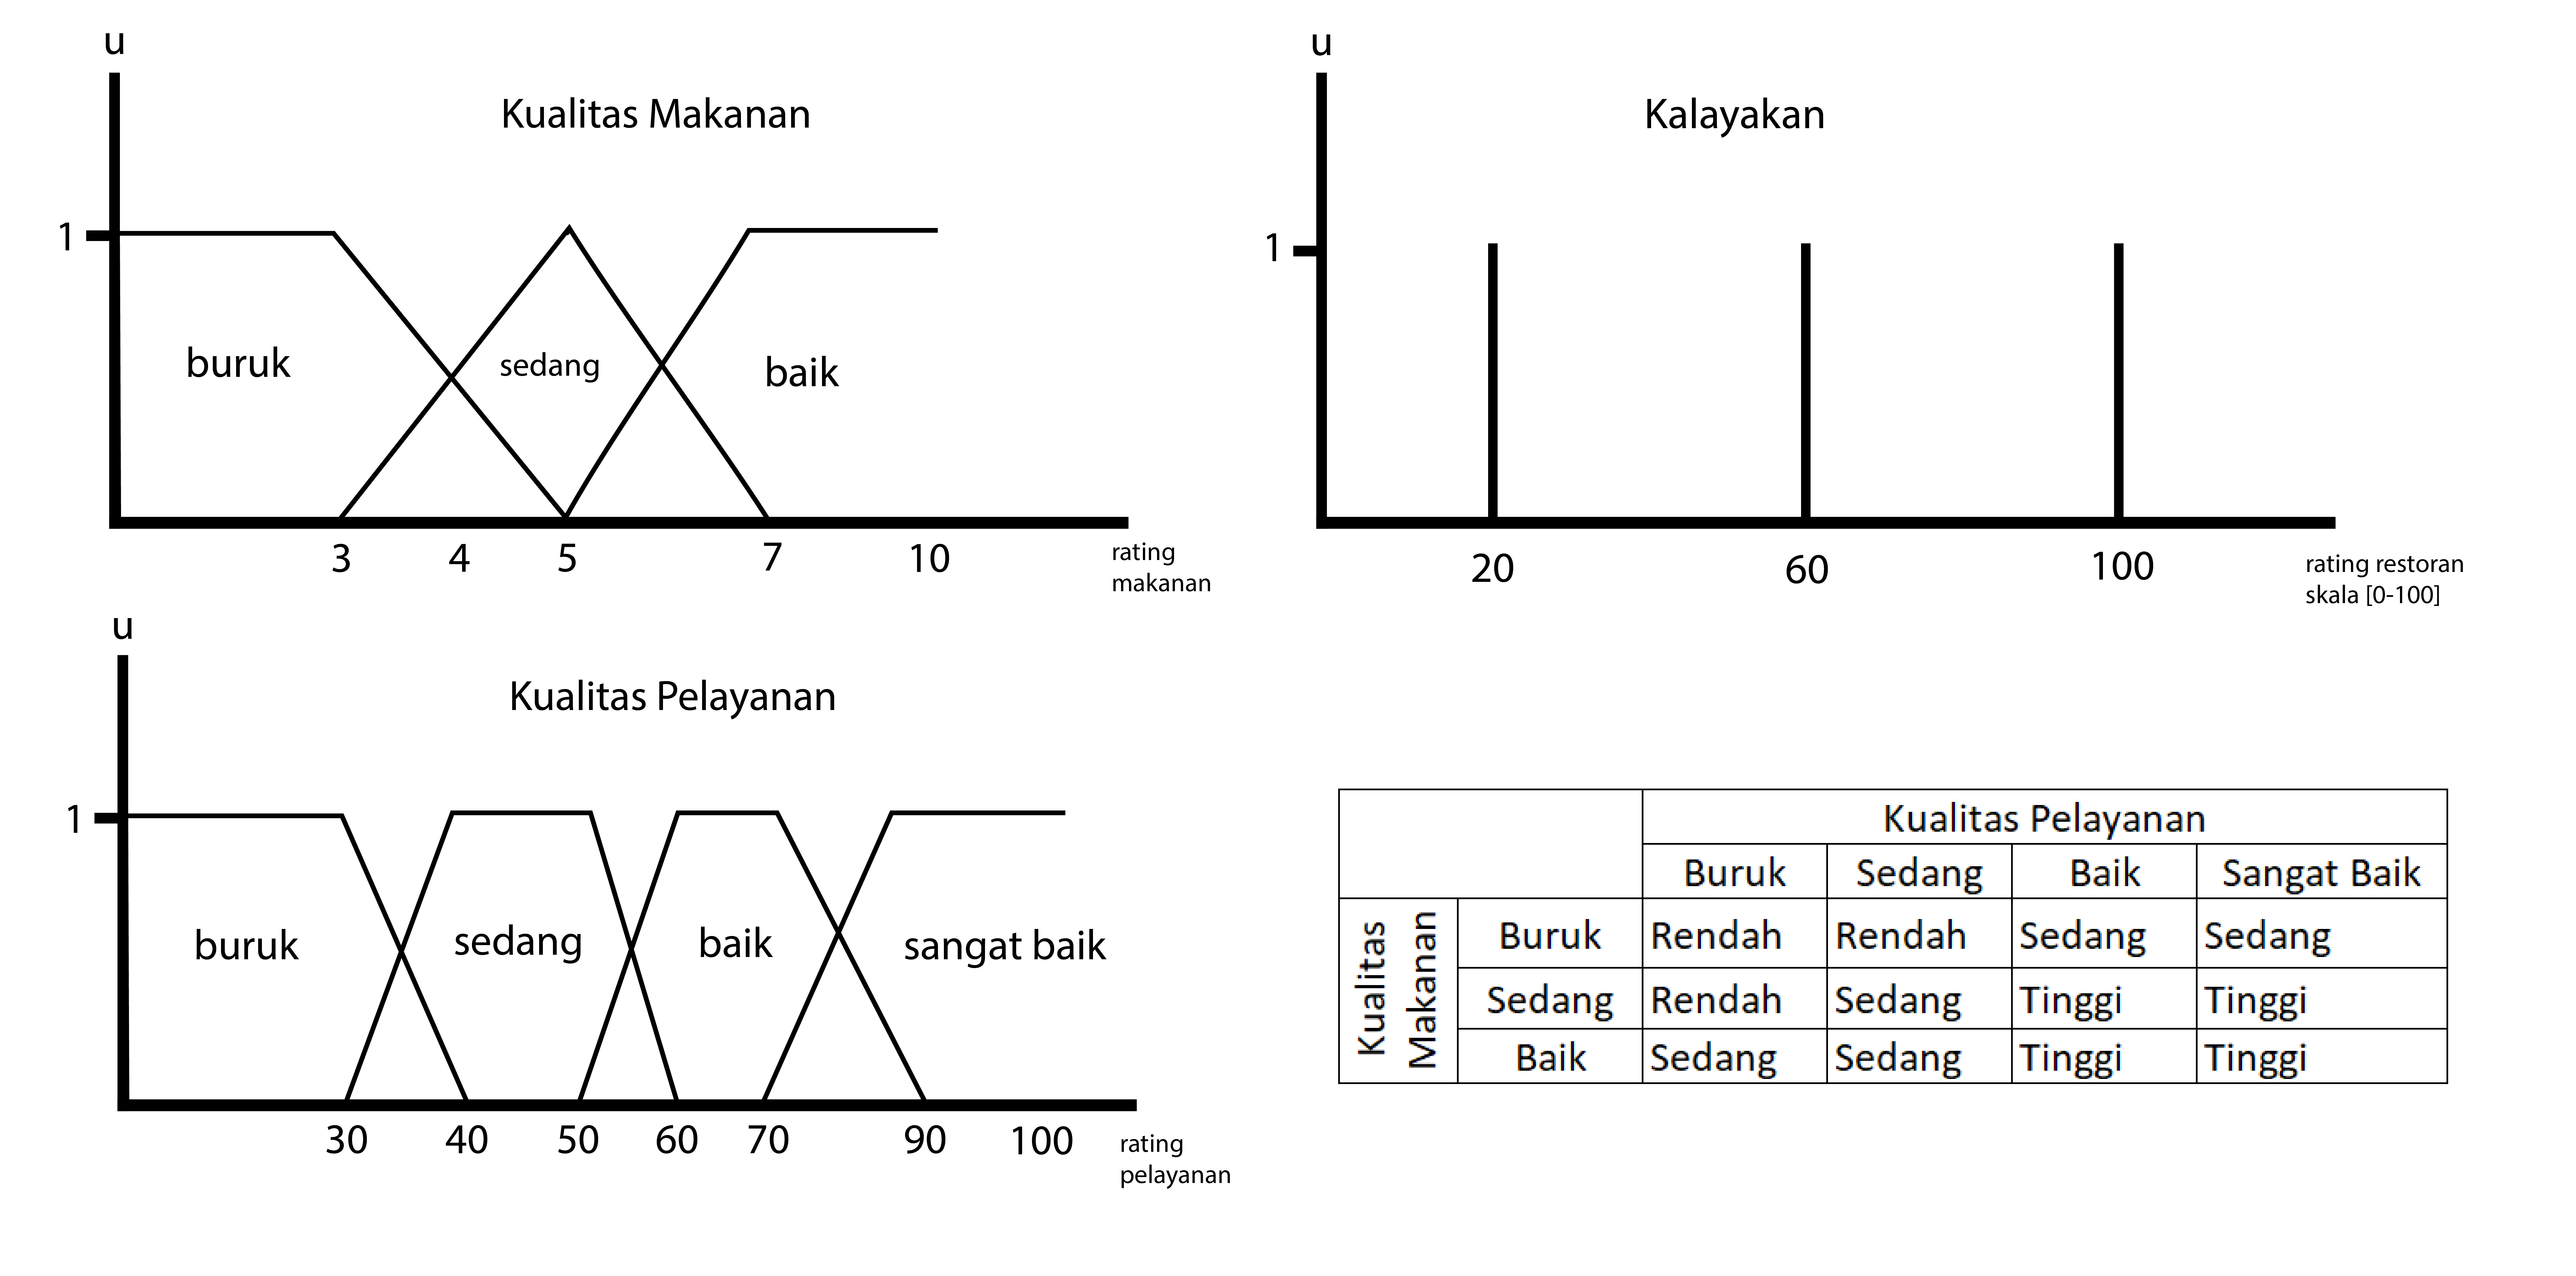

Import Library dan Pembacaan Files

In [59]:
import pandas as pd

In [64]:
data = pd.read_excel("restoran.xlsx")
data

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [116]:
id = data["id"]
pelayanan = data["pelayanan"]
makanan = data["makanan"]

Pendefinisian Fungsi Keanggotaan

In [26]:
def trapesium(x, a, b, c, d):
  if x <= a:
    return 0
  elif a < x < b:
    return (x-a)/(b-a)
  elif b <= x <= c:
    return 1
  elif c < x < d:
    return (d-x)/(d-c)
  else:
    return 0

In [1]:
def segitiga(x, a, b, c):
    if x <= a:
        return 0
    elif a < x < b:
        return (x - a) / (b-a)
    elif x == b:
        return 1
    elif b < x < c:
        return (c - x) / (c-b)
    else:
        return 0

Fuzzifikasi

In [23]:
pelayanan_buruk = lambda x: trapesium(x, 0, 0, 30, 40)
pelayanan_sedang = lambda x: trapesium(x, 30, 40, 50, 60)
pelayanan_baik = lambda x: trapesium(x, 50, 60, 70, 90)
pelayanan_sangatbaik = lambda x: trapesium(x, 70, 90, 100, 100)

In [5]:
makanan_buruk = lambda x: trapesium(x, 0, 0, 3, 5)
makanan_sedang = lambda x: segitiga(x, 3, 5, 7)
makanan_baik = lambda x: trapesium(x, 5, 7, 11, 11)

In [71]:
def u_pelayanan(x):
  pburuk = pelayanan_buruk(x)
  psedang = pelayanan_sedang(x)
  pbaik = pelayanan_baik(x)
  psangatbaik = pelayanan_sangatbaik(x)

  return pburuk, psedang, pbaik, psangatbaik

In [72]:
def u_makanan(y):

  mburuk = makanan_buruk(y)
  msedang = makanan_sedang(y)
  mbaik = makanan_baik(y)

  return mburuk, msedang, mbaik

Inferensi

In [82]:
# RULES SUGENO

def inference():
  rendah = 0
  tinggi = 0
  sedang = 0

  #1
  if pburuk != 0 and mburuk != 0:
    temp = min(pburuk, mburuk)
    rendah = max(rendah, temp)
  #2
  if pburuk != 0 and msedang != 0:
    temp = min(pburuk, msedang)
    rendah = max(rendah, temp)
  #3
  if pburuk != 0 and mbaik != 0:
    temp = min(pburuk, mbaik)
    sedang = max(sedang, temp)
  #4
  if psedang != 0 and mburuk != 0:
    temp = min(psedang, mburuk)
    rendah = max(rendah, temp)
  #5
  if psedang != 0 and msedang != 0:
    temp = min(psedang, msedang)
    sedang = max(sedang, temp)
  #6
  if psedang != 0 and mbaik != 0:
    temp = min(psedang, mbaik)
    sedang = max(sedang, temp)
  #7
  if pbaik != 0 and mburuk != 0:
    temp = min(pbaik, mburuk)
    sedang = max(sedang, temp)
  #8
  if pbaik != 0 and msedang != 0:
    temp = min(pbaik, msedang)
    tinggi = max(tinggi, temp)
  #9
  if pbaik != 0 and mbaik != 0:
    temp = min(pbaik, mbaik)
    tinggi = max(tinggi, temp)
  #10
  if psangatbaik != 0 and mburuk != 0:
    temp = min(psangatbaik, mburuk)
    sedang = max(sedang, temp)
  #11
  if psangatbaik != 0 and msedang != 0:
    temp = min(psangatbaik, mburuk)
    tinggi = max(tinggi, temp)
  #12
  if psangatbaik != 0 and mbaik != 0:
    temp = min(psangatbaik, mbaik)
    tinggi = max(tinggi, temp)

  return tinggi, sedang, rendah

Defuzifikasi

In [101]:
def hasil(tinggi, sedang, rendah):
  value = ((tinggi * 100) + (rendah * 20) + (sedang * 60)) / ((tinggi + sedang + rendah))
  return value

Main Program

In [137]:
Peringkat = pd.DataFrame(columns = ['ID', 'Kelayakan'])

for i in range(len(data["id"])):
  pburuk, psedang, pbaik, psangatbaik = u_pelayanan(pelayanan[i])
  mburuk, msedang, mbaik = u_makanan(makanan[i])
  tinggi, sedang, rendah = inference()

  value = hasil(tinggi, sedang, rendah)
  id_restoran = id[i]
  Peringkat = Peringkat.append({'ID': id_restoran, 'Kelayakan': value}, ignore_index=True)

Peringkat = Peringkat.sort_values(by='Kelayakan', ascending = False)

Excel = Peringkat.head(10)
Excel = Excel["ID"]

Export Dataframe menjadi file restoran.xls

In [140]:
writer = pd.ExcelWriter('restoran.xls')
Excel.to_excel(writer, index = False)
writer.save()